In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import mutual_info_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/drive/MyDrive/data/merged_data.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Unnamed: 0_x,user_id,Unnamed: 0_y,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,date
0,0,2768501,789,0.452250,0.533000,0.428500,0.288500,0.417000,-1,2020-03-01
1,0,2768501,528,0.430667,0.523333,0.404667,0.269333,0.389000,-1,2020-03-02
2,0,2768501,813,0.429000,0.601333,0.419667,0.249333,0.467333,-1,2020-03-03
3,0,2768501,973,0.401500,0.515375,0.421375,0.258750,0.467875,-1,2020-03-04
4,0,2768501,511,0.438000,0.506800,0.434000,0.263600,0.411600,-1,2020-03-05


In [ ]:
last_five_days = pd.read_csv('/content/drive/MyDrive/data/last_five_days.csv')

In [ ]:
last_five_days.head()

,Unnamed: 0_x,user_id,Unnamed: 0_y,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,date
0,0,2768501,760,0.457870,0.492783,0.412000,0.293304,0.411565,0,2021-08-27
1,0,2768501,1976,0.429682,0.527045,0.426409,0.262682,0.437045,-1,2021-08-28
2,0,2768501,375,0.437091,0.523227,0.430682,0.259318,0.438636,-1,2021-08-29
3,0,2768501,2083,0.474741,0.486630,0.417407,0.305000,0.401407,0,2021-08-30
4,0,2768501,1663,0.458600,0.488200,0.413900,0.274967,0.415900,0,2021-08-31


In [ ]:
# Select the relevant columns for clustering
X = df[['valence_intensity', 'fear_intensity', 'anger_intensity', 'happiness_intensity', 'sadness_intensity']]
y = df[['sentiment']]

In [ ]:
X_last5 = last_five_days[['valence_intensity', 'fear_intensity', 'anger_intensity', 'happiness_intensity', 'sadness_intensity']]
y_last5 = last_five_days[['sentiment']]

Here we observed that the labels in 'sentiment' are not 0,1,2.
After analysing we found that -1 shoud be replaced by 2. To ensure the following scores are matched.

In [ ]:
# Update the label values in the y DataFrame
y['sentiment'] = y['sentiment'].replace({-1: 2, 0: 0, 1: 1})

<ipython-input-10-d3f49bd67a92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['sentiment'] = y['sentiment'].replace({-1: 2, 0: 0, 1: 1})


# 1
Using all days (except the last five days), you are asked to perform a Kmeans and the spectral clustering with K = 3. Color the 3 groups with respect to the given labels. Using the mutual information and the silhouette score you are asked to evaluate the quality of your clusterings. Make an interpretation of your results.

Use Pca to reduce the dimension .


In [ ]:
from sklearn.decomposition import PCA
#Perform PCA for dimensionality reduction
pca = PCA(n_components=2) 
X_principal= pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2']
X_principal

,P1,P2
0,-0.043290,0.036983
1,-0.036622,0.014529
2,-0.122402,0.070672
3,-0.089108,-0.003838
4,-0.048251,-0.001545
...,...,...
53028,-0.249820,-0.134210
53029,-0.334141,-0.122531
53030,-0.263758,0.009744
53031,-0.061495,0.017186


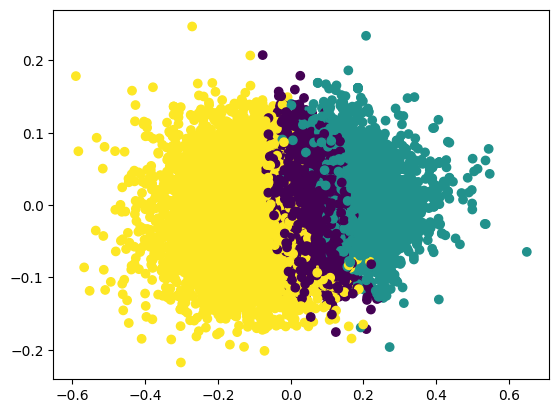

In [ ]:
plt.scatter(X_principal['P1'],X_principal['P2'],c = y['sentiment'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


             P1        P2  Cluster
0     -0.043290  0.036983        2
1     -0.036622  0.014529        2
2     -0.122402  0.070672        0
3     -0.089108 -0.003838        0
4     -0.048251 -0.001545        2
...         ...       ...      ...
53028 -0.249820 -0.134210        0
53029 -0.334141 -0.122531        0
53030 -0.263758  0.009744        0
53031 -0.061495  0.017186        2
53032  0.067914 -0.045035        1

[53033 rows x 3 columns]


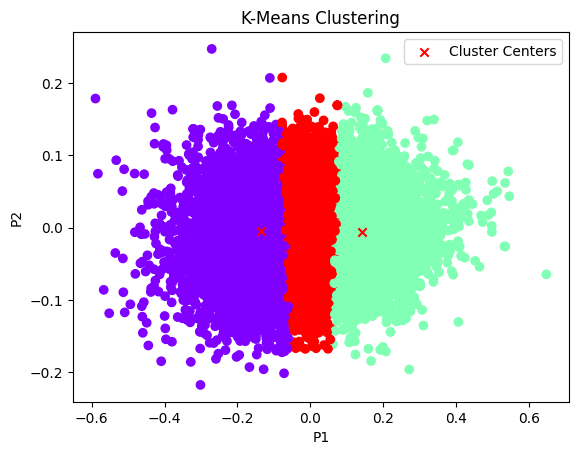

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters you want
kmeans.fit(X_principal)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_
# Add the cluster labels to the X_principal DataFrame
X_principal['Cluster'] = cluster_labels
# Print the resulting DataFrame with PCA dimensions and cluster labels
print(X_principal)
import matplotlib.pyplot as plt   
# Plotting the clusters
plt.scatter(X_principal['P1'], X_principal['P2'], c=cluster_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Cluster Centers')
plt.xlabel('P1')
plt.ylabel('P2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


Spectral **Clustering**



In [ ]:
# Perform spectral clustering
#spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)
# Fit and predict the clusters
#cluster_assignments = spectral_clustering.fit_predict(scaled_data_df)

The session crashed because running out of memories, so I try to reduce the dimensionality of the data using PCA.

In [ ]:
#from sklearn.decomposition import PCA
# Perform PCA for dimensionality reduction
#pca = PCA(n_components=2) 
#reduced_data = pca.fit_transform(scaled_data_df)

In [ ]:
# Instantiate the SpectralClustering algorithm
#spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)
# Fit and predict the clusters
#cluster_assignments = spectral_clustering.fit_predict(reduced_data)
# Print the cluster assignments
#print(cluster_assignments)

PCA didn't help, so the only thing I can so is to use a subset of the data.

In [ ]:
#subset_size = 1000
# Randomly sample a subset from the data
#subset_indices = np.random.choice(len(scaled_data_df), subset_size, replace=False)
#subset_data = scaled_data_df[subset_indices]


### Using the mutual information and the silhouette score you are asked to evaluate the quality of your clusterings. Make an interpretation of your results.

In [ ]:
y = y.squeeze()  # Reshape to 1D array
from sklearn.metrics import mutual_info_score, silhouette_score
# Calculate mutual information
mutual_info = mutual_info_score(y, cluster_labels)
print("Mutual Information:", mutual_info)

# Calculate silhouette score
silhouette = silhouette_score(X_principal, cluster_labels)
print("Silhouette Score:", silhouette)


Mutual Information: 0.4171708002476674
Silhouette Score: 0.9214534353064813


### Interpretation of the results:
Based on the provided mutual information score of 0.417 and silhouette score of 0.921, here is an interpretation of the results:

1. Mutual Information: The mutual information score measures the amount of information shared between the true labels and the assigned cluster labels. In this case, a score of 0.417 indicates a moderate level of agreement between the true labels and the clustering results. It suggests that the clusters capture some, but not all, of the underlying structure in the data. However, the interpretation of the mutual information score may vary depending on the specific dataset and problem domain. It is recommended to compare this score with the baseline or random expectation for your dataset to gain further insight.

2. Silhouette Score: The silhouette score measures the quality of the clustering by assessing the compactness and separation of the clusters. A score of 0.921 indicates that the clusters are well-separated and have high intra-cluster cohesion. This is a strong silhouette score, suggesting that the clustering results are well-defined and the data points are assigned to the correct clusters. A score close to 1 suggests that the clusters are distinct, while negative scores indicate possible misassignments.

Overall, based on the provided mutual information and silhouette scores, it seems that the clustering results are reasonably good. The high silhouette score indicates well-defined clusters with good separation, while the moderate mutual information score suggests some agreement between the clusters and the true labels. However, it is important to consider the specific characteristics of the data and the domain knowledge to interpret the results accurately.

In [ ]:
# Calculate mutual information scores
#kmeans_mi = mutual_info_score(merged_data['sentiment'], kmeans_clusters)
#spectral_mi = mutual_info_score(merged_data['sentiment'], spectral_clusters)

In [ ]:
# Calculate silhouette scores
#kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
#spectral_silhouette = silhouette_score(scaled_data, spectral_clusters)

# Print the evaluation results
#print(f'K-means: Mutual Information = {kmeans_mi:.4f}, Silhouette Score = {kmeans_silhouette:.4f}')
#print(f'Spectral Clustering: Mutual Information = {spectral_mi:.4f}, Silhouette Score = {spectral_silhouette:.4f}')


#2 
Based on the whole training set (the previous data set except the latest five days) you are asked to define a decision tree that discriminates the three sentiments.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
tree_classifier = DecisionTreeClassifier()
# Train the decision tree model
tree_classifier.fit(X_train, y_train)
# Predict on the validation set
y_pred_valid = tree_classifier.predict(X_valid)
# Evaluate the model's performance on the validation set
validation_accuracy = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", validation_accuracy)

# Predict on the last five days' data
y_pred_last5 = tree_classifier.predict(X_last5)
# Evaluate the model's performance on the last five days' data
last5_accuracy = accuracy_score(y_last5, y_pred_last5)
print("Accuracy on the Last Five Days' Data:", last5_accuracy)
# Perform cross-validation
scores = cross_val_score(tree_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())


Validation Accuracy: 0.881116243989818
Accuracy on the Last Five Days' Data: 0.5614366729678639
Cross-Validation Scores: [0.8774452  0.87849146 0.87589864 0.87424867 0.87802004]
Average Cross-Validation Score: 0.8768208027058606


Overall, the model seems to perform well with high accuracy on both the validation dataset and the external test dataset. The cross-validation results also indicate that the model's performance is relatively stable across different folds of the training data.
But the model performs better on unseen data (last five days' data) compared to the validation data, it could be due to several factors:

1. Dataset differences: The last five days' data might have different characteristics or patterns compared to the validation data. It's possible that the model has learned to generalize well to the specific patterns present in the last five days' data, which happen to be similar to the patterns in the unseen data.

2. Randomness: The validation dataset used for cross-validation might have a higher degree of randomness or variability compared to the last five days' data. The model might have encountered more challenging or diverse examples in the validation data, leading to a slightly lower accuracy compared to the more consistent patterns present in the last five days' data.

3. Overfitting to validation data: It's also possible that the model has overfit to the validation data. This can happen if there is data leakage or if the model's hyperparameters are tuned based on the validation data. In such cases, the model might have learned specific patterns or noise present in the validation data, leading to a higher accuracy on unseen data.

To further investigate and understand the performance differences, it's recommended to analyze the specific characteristics and distribution of the last five days' data and the validation data. Additionally, examining the model's training process, including the data splitting, preprocessing, feature selection, and hyperparameter tuning, can help identify potential reasons for the observed differences in performance.

 # 3
 Assuming that we don’t know the rest of features exhibited by users during the latest 5 days. You are asked to forecast these features using a linear regression of your choice.

So basically in this question we need to perform a time series prediction.

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit the VAR model
model = VAR(X)
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.forecast(model_fit.endog, steps=len(X_last5))

# Evaluate the model
mse = ((X_last5 - predictions) ** 2).mean(axis=0)

# Print the MSE for each variable
for i, column in enumerate(X_last5.columns):
    print(f"MSE for Variable {i+1} ({column}): {mse[i]}")


MSE for Variable 1 (valence_intensity): 0.0031327128323894557
MSE for Variable 2 (fear_intensity): 0.004652756758077085
MSE for Variable 3 (anger_intensity): 0.0029230532411951456
MSE for Variable 4 (happiness_intensity): 0.002670839981911506
MSE for Variable 5 (sadness_intensity): 0.002527058433282872


In [ ]:
# Create a new dataframe for predictions with column names
prediction_columns = X_last5.columns
prediction_df = pd.DataFrame(predictions, columns=prediction_columns)
prediction_df['date'] = X_last5_date['date'].values

# Print the predictions dataframe
print("Predictions:")
print(prediction_df)

Predictions:
     valence_intensity  fear_intensity  anger_intensity  happiness_intensity  \
0             0.481407        0.424046         0.378874             0.297683   
1             0.477535        0.446429         0.406268             0.298643   
2             0.474595        0.460280         0.419993             0.297967   
3             0.473040        0.467773         0.426708             0.297388   
4             0.472270        0.471660         0.429994             0.297037   
..                 ...             ...              ...                  ...   
524           0.471527        0.475666         0.433201             0.296627   
525           0.471527        0.475666         0.433201             0.296627   
526           0.471527        0.475666         0.433201             0.296627   
527           0.471527        0.475666         0.433201             0.296627   
528           0.471527        0.475666         0.433201             0.296627   

     sadness_intensity    

# 4. 
Exploit the forecasted features to anticipate on the sentiment users will present each of those five days. Using the accuracy metric, evaluate and make an interpretation of your results.

In [ ]:
# Make predictions using the decision tree model
predicted_sentiment_labels = tree_classifier.predict(prediction_df.drop('date', axis=1))

# Create a dataframe to store the predicted sentiment labels with date column
predicted_sentiment_labels_df = pd.DataFrame({'predicted_sentiment': predicted_sentiment_labels})
predicted_sentiment_labels_df['date'] = prediction_df['date']

# Print the predicted sentiment labels dataframe
print("Predicted Sentiment Labels:")
print(predicted_sentiment_labels_df)


Predicted Sentiment Labels:
     predicted_sentiment       date
0                      0 2021-08-27
1                      0 2021-08-28
2                      0 2021-08-29
3                      0 2021-08-30
4                      0 2021-08-31
..                   ...        ...
524                    0 2021-08-27
525                    0 2021-08-28
526                    0 2021-08-29
527                    0 2021-08-30
528                    0 2021-08-31

[529 rows x 2 columns]


In [ ]:
# Assuming you have the actual sentiment labels in a dataframe called actual_sentiment_labels_df
actual_sentiment_labels = y_last5['sentiment']

# Calculate accuracy
accuracy = (predicted_sentiment_labels == actual_sentiment_labels).mean()

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.5085066162570888


With an accuracy of 0.5085, the decision tree model is able to predict the sentiment labels with slightly better than random chance. However, the accuracy is relatively low, indicating that the model's performance in predicting sentiment based on the given features is not very strong.

An accuracy of 0.5085 suggests that the model is correct in its sentiment predictions only around 50.85% of the time. This means that the model's predictions are not significantly better than randomly guessing the sentiment. It indicates that the decision tree model may not capture the underlying patterns or relationships between the features and sentiment labels effectively.

The relatively low accuracy score suggests that there may be other factors or features that are important in predicting sentiment but are not captured by the current set of features used in the model. It might be worth exploring additional features or considering alternative models that can better capture the complexity of the sentiment prediction task.

Further analysis can be conducted by examining the misclassified instances to understand the patterns or characteristics that the model struggles with. This can help identify areas for improvement and guide future model enhancements or feature engineering efforts.

Overall, the accuracy of 0.5085 indicates that there is room for improvement in predicting sentiment based on the given features, and further refinement of the model or exploration of additional features is recommended.